In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [219]:
df=df.dropna(subset=['Price'])

In [220]:
df.shape

(27247, 21)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         27247 non-null  object 
 6   SellerG        27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Bedroom2       20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Lattitude      20993 non-null  float64
 18  Longti

In [222]:
corr_matrix=df.corr()
corr_matrix['Price'].sort_values(ascending=False)

C:\Users\power\AppData\Local\Temp\ipykernel_6524\36192693.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


Price            1.000000
Rooms            0.465238
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Longtitude       0.197874
BuildingArea     0.100754
Postcode         0.044950
Landsize         0.032748
Propertycount   -0.059017
Distance        -0.211384
Lattitude       -0.215607
YearBuilt       -0.333306
Name: Price, dtype: float64

In [223]:
df=df.drop(['BuildingArea','Postcode','Landsize','Propertycount'],axis=1)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3.0,2.0,1.0,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3.0,1.0,2.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       27247 non-null  object 
 1   Address      27247 non-null  object 
 2   Rooms        27247 non-null  int64  
 3   Type         27247 non-null  object 
 4   Price        27247 non-null  float64
 5   Method       27247 non-null  object 
 6   SellerG      27247 non-null  object 
 7   Date         27247 non-null  object 
 8   Distance     27246 non-null  float64
 9   Bedroom2     20806 non-null  float64
 10  Bathroom     20800 non-null  float64
 11  Car          20423 non-null  float64
 12  YearBuilt    12084 non-null  float64
 13  CouncilArea  27244 non-null  object 
 14  Lattitude    20993 non-null  float64
 15  Longtitude   20993 non-null  float64
 16  Regionname   27244 non-null  object 
dtypes: float64(8), int64(1), object(8)
memory usage: 3.7+ MB


In [225]:
df=df.dropna(subset=['Distance'])

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27246 entries, 1 to 34856
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       27246 non-null  object 
 1   Address      27246 non-null  object 
 2   Rooms        27246 non-null  int64  
 3   Type         27246 non-null  object 
 4   Price        27246 non-null  float64
 5   Method       27246 non-null  object 
 6   SellerG      27246 non-null  object 
 7   Date         27246 non-null  object 
 8   Distance     27246 non-null  float64
 9   Bedroom2     20806 non-null  float64
 10  Bathroom     20800 non-null  float64
 11  Car          20423 non-null  float64
 12  YearBuilt    12084 non-null  float64
 13  CouncilArea  27244 non-null  object 
 14  Lattitude    20993 non-null  float64
 15  Longtitude   20993 non-null  float64
 16  Regionname   27244 non-null  object 
dtypes: float64(8), int64(1), object(8)
memory usage: 3.7+ MB


In [227]:
a=df['Bedroom2'].mean()
a

3.0462366625012014

In [228]:
df['Bedroom2']=df['Bedroom2'].fillna(3)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27246 entries, 1 to 34856
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       27246 non-null  object 
 1   Address      27246 non-null  object 
 2   Rooms        27246 non-null  int64  
 3   Type         27246 non-null  object 
 4   Price        27246 non-null  float64
 5   Method       27246 non-null  object 
 6   SellerG      27246 non-null  object 
 7   Date         27246 non-null  object 
 8   Distance     27246 non-null  float64
 9   Bedroom2     27246 non-null  float64
 10  Bathroom     20800 non-null  float64
 11  Car          20423 non-null  float64
 12  YearBuilt    12084 non-null  float64
 13  CouncilArea  27244 non-null  object 
 14  Lattitude    20993 non-null  float64
 15  Longtitude   20993 non-null  float64
 16  Regionname   27244 non-null  object 
dtypes: float64(8), int64(1), object(8)
memory usage: 3.7+ MB


In [230]:
df['Bathroom'].mean()

1.5916826923076923

In [231]:
df['Bathroom']=df['Bathroom'].fillna(2)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27246 entries, 1 to 34856
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       27246 non-null  object 
 1   Address      27246 non-null  object 
 2   Rooms        27246 non-null  int64  
 3   Type         27246 non-null  object 
 4   Price        27246 non-null  float64
 5   Method       27246 non-null  object 
 6   SellerG      27246 non-null  object 
 7   Date         27246 non-null  object 
 8   Distance     27246 non-null  float64
 9   Bedroom2     27246 non-null  float64
 10  Bathroom     27246 non-null  float64
 11  Car          20423 non-null  float64
 12  YearBuilt    12084 non-null  float64
 13  CouncilArea  27244 non-null  object 
 14  Lattitude    20993 non-null  float64
 15  Longtitude   20993 non-null  float64
 16  Regionname   27244 non-null  object 
dtypes: float64(8), int64(1), object(8)
memory usage: 3.7+ MB


In [233]:
df['Car'].mean()

1.7153699260637516

In [234]:
df['Car']=df['Car'].fillna(2)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27246 entries, 1 to 34856
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       27246 non-null  object 
 1   Address      27246 non-null  object 
 2   Rooms        27246 non-null  int64  
 3   Type         27246 non-null  object 
 4   Price        27246 non-null  float64
 5   Method       27246 non-null  object 
 6   SellerG      27246 non-null  object 
 7   Date         27246 non-null  object 
 8   Distance     27246 non-null  float64
 9   Bedroom2     27246 non-null  float64
 10  Bathroom     27246 non-null  float64
 11  Car          27246 non-null  float64
 12  YearBuilt    12084 non-null  float64
 13  CouncilArea  27244 non-null  object 
 14  Lattitude    20993 non-null  float64
 15  Longtitude   20993 non-null  float64
 16  Regionname   27244 non-null  object 
dtypes: float64(8), int64(1), object(8)
memory usage: 3.7+ MB


In [236]:
df['YearBuilt'].mean()

1966.6091525984773

In [237]:
df['YearBuilt']=df['YearBuilt'].fillna(1967)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27246 entries, 1 to 34856
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       27246 non-null  object 
 1   Address      27246 non-null  object 
 2   Rooms        27246 non-null  int64  
 3   Type         27246 non-null  object 
 4   Price        27246 non-null  float64
 5   Method       27246 non-null  object 
 6   SellerG      27246 non-null  object 
 7   Date         27246 non-null  object 
 8   Distance     27246 non-null  float64
 9   Bedroom2     27246 non-null  float64
 10  Bathroom     27246 non-null  float64
 11  Car          27246 non-null  float64
 12  YearBuilt    27246 non-null  float64
 13  CouncilArea  27244 non-null  object 
 14  Lattitude    20993 non-null  float64
 15  Longtitude   20993 non-null  float64
 16  Regionname   27244 non-null  object 
dtypes: float64(8), int64(1), object(8)
memory usage: 3.7+ MB


In [239]:
df=df.dropna(subset=['CouncilArea'])

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       27244 non-null  object 
 1   Address      27244 non-null  object 
 2   Rooms        27244 non-null  int64  
 3   Type         27244 non-null  object 
 4   Price        27244 non-null  float64
 5   Method       27244 non-null  object 
 6   SellerG      27244 non-null  object 
 7   Date         27244 non-null  object 
 8   Distance     27244 non-null  float64
 9   Bedroom2     27244 non-null  float64
 10  Bathroom     27244 non-null  float64
 11  Car          27244 non-null  float64
 12  YearBuilt    27244 non-null  float64
 13  CouncilArea  27244 non-null  object 
 14  Lattitude    20993 non-null  float64
 15  Longtitude   20993 non-null  float64
 16  Regionname   27244 non-null  object 
dtypes: float64(8), int64(1), object(8)
memory usage: 3.7+ MB


In [241]:
df['Lattitude'].mean()

-37.80696302719954

In [242]:
df['Lattitude']=df['Lattitude'].fillna(-37.8069)

In [243]:
df['Longtitude'].mean()

144.99671101938742

In [244]:
df['Longtitude']=df['Longtitude'].fillna(144.9967)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       27244 non-null  object 
 1   Address      27244 non-null  object 
 2   Rooms        27244 non-null  int64  
 3   Type         27244 non-null  object 
 4   Price        27244 non-null  float64
 5   Method       27244 non-null  object 
 6   SellerG      27244 non-null  object 
 7   Date         27244 non-null  object 
 8   Distance     27244 non-null  float64
 9   Bedroom2     27244 non-null  float64
 10  Bathroom     27244 non-null  float64
 11  Car          27244 non-null  float64
 12  YearBuilt    27244 non-null  float64
 13  CouncilArea  27244 non-null  object 
 14  Lattitude    27244 non-null  float64
 15  Longtitude   27244 non-null  float64
 16  Regionname   27244 non-null  object 
dtypes: float64(8), int64(1), object(8)
memory usage: 3.7+ MB


<AxesSubplot:xlabel='Lattitude', ylabel='Longtitude'>

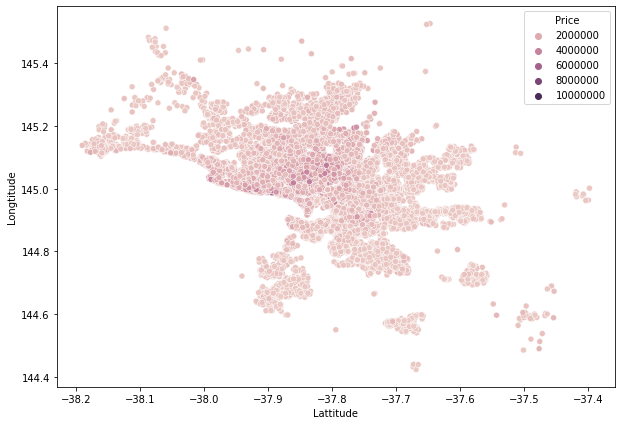

In [246]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Lattitude'],y=df['Longtitude'],hue=df['Price'])

In [247]:
corr_matrix=df.corr()
corr_matrix['Price'].sort_values(ascending=False)

C:\Users\power\AppData\Local\Temp\ipykernel_6524\36192693.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


Price         1.000000
Rooms         0.465231
Bedroom2      0.385213
Bathroom      0.337293
Longtitude    0.176824
Car           0.162124
Lattitude    -0.192702
Distance     -0.211415
YearBuilt    -0.232589
Name: Price, dtype: float64

In [248]:
df=df.drop('Car',axis=1)

In [249]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1967.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3.0,2.0,1967.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3.0,1.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
10,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,2.0,1.0,1967.0,Yarra City Council,-37.8041,144.9953,Northern Metropolitan
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,4.0,2.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,2.0,1.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3.0,2.0,1967.0,Yarra City Council,-37.8069,144.9967,Northern Metropolitan
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3.0,2.0,1967.0,Yarra City Council,-37.8069,144.9967,Northern Metropolitan


In [250]:
df.shape

(27244, 16)

In [251]:
df=df.drop(['Address','SellerG','Date'],axis=1)
df.head()

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
1,Abbotsford,2,h,1480000.0,S,2.5,2.0,1.0,1967.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,2,h,1035000.0,S,2.5,2.0,1.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,SP,2.5,3.0,2.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
5,Abbotsford,3,h,850000.0,PI,2.5,3.0,2.0,1967.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan
6,Abbotsford,4,h,1600000.0,VB,2.5,3.0,1.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan


In [252]:
df['Suburb'].nunique()

344

In [253]:
df1=pd.DataFrame(df['Suburb'].value_counts()==1)

In [254]:
df1

,Suburb
Reservoir,False
Bentleigh East,False
Richmond,False
Preston,False
Brunswick,False
...,...
croydon,True
Tecoma,True
Cranbourne East,True
Yarra Glen,True


In [255]:
df1=df1[df1['Suburb']==True]

In [256]:
df1

,Suburb
Darley,True
Wandin North,True
Eynesbury,True
Ferny Creek,True
Bulla,True
Lysterfield,True
Coldstream,True
Montrose,True
Botanic Ridge,True
viewbank,True


In [257]:
a=df1.index

In [258]:
a

Index(['Darley', 'Wandin North', 'Eynesbury', 'Ferny Creek', 'Bulla',
       'Lysterfield', 'Coldstream', 'Montrose', 'Botanic Ridge', 'viewbank',
       'Wildwood', 'Monbulk', 'croydon', 'Tecoma', 'Cranbourne East',
       'Yarra Glen', 'Kalkallo'],
      dtype='object')

In [259]:
b=np.array(a)

In [260]:
b

array(['Darley', 'Wandin North', 'Eynesbury', 'Ferny Creek', 'Bulla',
       'Lysterfield', 'Coldstream', 'Montrose', 'Botanic Ridge',
       'viewbank', 'Wildwood', 'Monbulk', 'croydon', 'Tecoma',
       'Cranbourne East', 'Yarra Glen', 'Kalkallo'], dtype=object)

In [261]:
df2=df[df.Suburb.isin(b)==False]

In [262]:
df.shape

(27244, 13)

In [263]:
df2.shape

(27227, 13)

In [264]:
df2.head()

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
1,Abbotsford,2,h,1480000.0,S,2.5,2.0,1.0,1967.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,2,h,1035000.0,S,2.5,2.0,1.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,SP,2.5,3.0,2.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
5,Abbotsford,3,h,850000.0,PI,2.5,3.0,2.0,1967.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan
6,Abbotsford,4,h,1600000.0,VB,2.5,3.0,1.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan


In [265]:
df3=pd.get_dummies(df2['Suburb'])

In [266]:
df3.head()

,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,...,Whittlesea,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarraville
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
df4=pd.concat([df2,df3],axis=1)
df4.head()

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,YearBuilt,CouncilArea,...,Whittlesea,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarraville
1,Abbotsford,2,h,1480000.0,S,2.5,2.0,1.0,1967.0,Yarra City Council,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,2,h,1035000.0,S,2.5,2.0,1.0,1900.0,Yarra City Council,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,3,h,1465000.0,SP,2.5,3.0,2.0,1900.0,Yarra City Council,...,0,0,0,0,0,0,0,0,0,0
5,Abbotsford,3,h,850000.0,PI,2.5,3.0,2.0,1967.0,Yarra City Council,...,0,0,0,0,0,0,0,0,0,0
6,Abbotsford,4,h,1600000.0,VB,2.5,3.0,1.0,2014.0,Yarra City Council,...,0,0,0,0,0,0,0,0,0,0


In [268]:
df4=df4.drop('Suburb',axis=1)

In [269]:
df4.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,YearBuilt,CouncilArea,Lattitude,...,Whittlesea,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarraville
1,2,h,1480000.0,S,2.5,2.0,1.0,1967.0,Yarra City Council,-37.7996,...,0,0,0,0,0,0,0,0,0,0
2,2,h,1035000.0,S,2.5,2.0,1.0,1900.0,Yarra City Council,-37.8079,...,0,0,0,0,0,0,0,0,0,0
4,3,h,1465000.0,SP,2.5,3.0,2.0,1900.0,Yarra City Council,-37.8093,...,0,0,0,0,0,0,0,0,0,0
5,3,h,850000.0,PI,2.5,3.0,2.0,1967.0,Yarra City Council,-37.7969,...,0,0,0,0,0,0,0,0,0,0
6,4,h,1600000.0,VB,2.5,3.0,1.0,2014.0,Yarra City Council,-37.8072,...,0,0,0,0,0,0,0,0,0,0


In [270]:
df4['Type'].value_counts()

h    18454
u     5908
t     2865
Name: Type, dtype: int64

In [271]:
df4['Type']=df4['Type'].replace({'h':0,'u':1,'t':2})

In [272]:
df4.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,YearBuilt,CouncilArea,Lattitude,...,Whittlesea,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarraville
1,2,0,1480000.0,S,2.5,2.0,1.0,1967.0,Yarra City Council,-37.7996,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1035000.0,S,2.5,2.0,1.0,1900.0,Yarra City Council,-37.8079,...,0,0,0,0,0,0,0,0,0,0
4,3,0,1465000.0,SP,2.5,3.0,2.0,1900.0,Yarra City Council,-37.8093,...,0,0,0,0,0,0,0,0,0,0
5,3,0,850000.0,PI,2.5,3.0,2.0,1967.0,Yarra City Council,-37.7969,...,0,0,0,0,0,0,0,0,0,0
6,4,0,1600000.0,VB,2.5,3.0,1.0,2014.0,Yarra City Council,-37.8072,...,0,0,0,0,0,0,0,0,0,0


In [273]:
df4['Method'].value_counts()

S     17505
SP     3596
PI     3253
VB     2683
SA      190
Name: Method, dtype: int64

In [274]:
df4['Method']=df4['Method'].replace({'S':0,'SP':1,'PI':2,'VB':3,'SA':4})
df4.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,YearBuilt,CouncilArea,Lattitude,...,Whittlesea,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wonga Park,Wyndham Vale,Yallambie,Yarraville
1,2,0,1480000.0,0,2.5,2.0,1.0,1967.0,Yarra City Council,-37.7996,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1035000.0,0,2.5,2.0,1.0,1900.0,Yarra City Council,-37.8079,...,0,0,0,0,0,0,0,0,0,0
4,3,0,1465000.0,1,2.5,3.0,2.0,1900.0,Yarra City Council,-37.8093,...,0,0,0,0,0,0,0,0,0,0
5,3,0,850000.0,2,2.5,3.0,2.0,1967.0,Yarra City Council,-37.7969,...,0,0,0,0,0,0,0,0,0,0
6,4,0,1600000.0,3,2.5,3.0,1.0,2014.0,Yarra City Council,-37.8072,...,0,0,0,0,0,0,0,0,0,0


In [275]:
df['CouncilArea'].nunique()

33

In [276]:
df5=pd.get_dummies(df4['CouncilArea'])

In [277]:
df5.head()

,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,...,Moorabool Shire Council,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [278]:
df6=pd.concat([df4,df5],axis=1)

In [279]:
df6=df6.drop('CouncilArea',axis=1)

In [280]:
df6.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,YearBuilt,Lattitude,Longtitude,...,Moorabool Shire Council,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council
1,2,0,1480000.0,0,2.5,2.0,1.0,1967.0,-37.7996,144.9984,...,0,0,0,0,0,0,0,0,1,0
2,2,0,1035000.0,0,2.5,2.0,1.0,1900.0,-37.8079,144.9934,...,0,0,0,0,0,0,0,0,1,0
4,3,0,1465000.0,1,2.5,3.0,2.0,1900.0,-37.8093,144.9944,...,0,0,0,0,0,0,0,0,1,0
5,3,0,850000.0,2,2.5,3.0,2.0,1967.0,-37.7969,144.9969,...,0,0,0,0,0,0,0,0,1,0
6,4,0,1600000.0,3,2.5,3.0,1.0,2014.0,-37.8072,144.9941,...,0,0,0,0,0,0,0,0,1,0


In [281]:
df.head()

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
1,Abbotsford,2,h,1480000.0,S,2.5,2.0,1.0,1967.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,2,h,1035000.0,S,2.5,2.0,1.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,SP,2.5,3.0,2.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
5,Abbotsford,3,h,850000.0,PI,2.5,3.0,2.0,1967.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan
6,Abbotsford,4,h,1600000.0,VB,2.5,3.0,1.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan


In [282]:
df6['Regionname']

1        Northern Metropolitan
2        Northern Metropolitan
4        Northern Metropolitan
5        Northern Metropolitan
6        Northern Metropolitan
                 ...          
34852     Western Metropolitan
34853     Western Metropolitan
34854     Western Metropolitan
34855     Western Metropolitan
34856     Western Metropolitan
Name: Regionname, Length: 27227, dtype: object

In [283]:
df6['Regionname'].nunique()

8

In [284]:
df7=pd.get_dummies(df6['Regionname'])

In [285]:
df8=pd.concat([df6,df7],axis=1)

In [289]:
df8.shape

(27227, 378)

In [291]:
X=df8.drop('Price',axis=1)
y=df8['Price']

In [292]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [293]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [308]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()

In [315]:
from sklearn.model_selection import GridSearchCV
grid2=GridSearchCV(model2,{'n_estimators':[100,120,140],'max_depth':[6,8,10],'max_features':[21,25,30]})
grid2.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 8, 10], 'max_features': [21, 25, 30],
                         'n_estimators': [100, 120, 140]})

In [316]:
grid2.score(X_test,y_test)

0.656213393292391

In [317]:
grid2.best_params_

{'max_depth': 10, 'max_features': 30, 'n_estimators': 140}